# Offchain Governance (Boardroom/Snapshot API)

In [2]:
import requests
from requests.structures import CaseInsensitiveDict

url = "https://api.boardroom.info/v1/protocols"

headers = CaseInsensitiveDict()
headers["accept"] = "application/json"


resp = requests.get(url, headers=headers)

In [12]:
jsonmm = resp.json()

In [4]:
import pandas as pd
import json
import ast

In [5]:
df = pd.json_normalize((ast.literal_eval(resp.text))['data'])

In [6]:
df.describe()

,totalProposals,totalVotes,uniqueVoters
count,103.000000,103.000000,103.000000
mean,49.970874,4213.941748,1014.815534
std,77.986859,10269.441665,1771.874330
min,0.000000,0.000000,0.000000
25%,7.000000,76.500000,30.500000
50%,20.000000,535.000000,278.000000
75%,55.000000,3730.500000,1030.000000
max,447.000000,78617.000000,8325.000000


In [7]:
df.head()

,cname,name,categories,totalProposals,totalVotes,uniqueVoters,icons,tokens,type,associatedProtocols,associatedAddresses
0,1inch,1inch,[Protocol],3,214,175,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO,[],[]
1,aave,Aave,[Protocol],61,1909,962,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO,[],[]
2,aavegotchi,Aavegotchi,[Protocol],246,78617,6545,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",DAO,[],[]
3,alchemist,Alchemist,[Service],24,521,301,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'mist', 'net...",DAO,[],[]
4,alchemixfinance,Alchemix Finance,[Protocol],40,6666,1715,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'alcx', 'net...",DAO,[],[]


In [8]:
df[["categories"]].describe()

,categories
count,103
unique,9
top,[Protocol]
freq,54


In [ ]:
df[["type"]].describe()

In [ ]:
df[["icons"]]

In [17]:
df3 = df[["icons"]]

In [18]:
df4= df3.explode('icons')

In [ ]:
df4.head()

In [22]:
df_final_url = (pd.DataFrame(df4["icons"].apply(pd.Series)))
df_final_url.head()

,0,adapter,size,url
0,NaN,default,thumb,https://assets.coingecko.com/coins/images/1346...
0,NaN,default,small,https://assets.coingecko.com/coins/images/1346...
0,NaN,default,large,https://assets.coingecko.com/coins/images/1346...
1,NaN,default,thumb,https://assets.coingecko.com/coins/images/1264...
1,NaN,default,small,https://assets.coingecko.com/coins/images/1264...


In [25]:
df_contract = df_final_url[["url"]]
df_contract.head()

,url
0,https://assets.coingecko.com/coins/images/1346...
0,https://assets.coingecko.com/coins/images/1346...
0,https://assets.coingecko.com/coins/images/1346...
1,https://assets.coingecko.com/coins/images/1264...
1,https://assets.coingecko.com/coins/images/1264...


In [23]:
df_tokens = df[["tokens"]]
df_tokens= df_tokens.explode('tokens')
df_final_tokens = (pd.DataFrame(df_tokens["tokens"].apply(pd.Series)))
df_final_tokens.head()

,0,adapter,contractAddress,marketPrices,network,symbol
0,NaN,default,0x111111111117dc0aa78b770fa6a738034120c302,"[{'currency': 'usd', 'price': 1.5}]",ethereum,1inch
1,NaN,default,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,"[{'currency': 'usd', 'price': 140.19}]",ethereum,aave
2,NaN,default,0x3f382dbd960e3a9bbceae22651e88158d2791550,"[{'currency': 'usd', 'price': 2.01}]",ethereum,ghst
3,NaN,default,0x88acdd2a6425c3faae4bc9650fd7e27e0bebb7ab,"[{'currency': 'usd', 'price': 19.73}]",ethereum,mist
4,NaN,default,0xdbdb4d16eda451d0503b854cf79d55697f90c8df,"[{'currency': 'usd', 'price': 138.13}]",ethereum,alcx


In [87]:
df_contract = df_final_tokens[["contractAddress", "network","symbol"]]
df_contract.head(20)

,contractAddress,network,symbol
0,0x111111111117dc0aa78b770fa6a738034120c302,ethereum,1inch
1,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,ethereum,aave
2,0x3f382dbd960e3a9bbceae22651e88158d2791550,ethereum,ghst
3,0x88acdd2a6425c3faae4bc9650fd7e27e0bebb7ab,ethereum,mist
4,0xdbdb4d16eda451d0503b854cf79d55697f90c8df,ethereum,alcx
5,0xd46ba6d942050d489dbd938a2c909a5d5039a161,ethereum,ampl
6,0xa117000000f279d81a1d3cc75430faa017fa5a2e,ethereum,ant
7,0x1337def16f9b486faed0293eb623dc8395dfe46a,ethereum,armor
8,0x3472a5a71965499acd81997a54bba8d852c6e53d,ethereum,badger
9,0xba100000625a3754423978a60c9317c58a424e3d,ethereum,bal


In [88]:
df_contract= df_contract.dropna()
df_contract = df_contract.reset_index(drop = True)
df_contract.shape

(80, 3)

In [89]:
df_contract.describe()

,contractAddress,network,symbol
count,80,80,80
unique,77,2,77
top,0xc944e90c64b2c07662a292be6244bdf05cda44a7,ethereum,grt
freq,2,79,2


# Treasury and Voting Data using Covalent API

Covalent Treasury Balance, Historial Portfolio, TokenHolders Distribution

In [90]:
df_contract.shape

(80, 3)

In [91]:
df_contract.head(20)

,contractAddress,network,symbol
0,0x111111111117dc0aa78b770fa6a738034120c302,ethereum,1inch
1,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,ethereum,aave
2,0x3f382dbd960e3a9bbceae22651e88158d2791550,ethereum,ghst
3,0x88acdd2a6425c3faae4bc9650fd7e27e0bebb7ab,ethereum,mist
4,0xdbdb4d16eda451d0503b854cf79d55697f90c8df,ethereum,alcx
5,0xd46ba6d942050d489dbd938a2c909a5d5039a161,ethereum,ampl
6,0xa117000000f279d81a1d3cc75430faa017fa5a2e,ethereum,ant
7,0x1337def16f9b486faed0293eb623dc8395dfe46a,ethereum,armor
8,0x3472a5a71965499acd81997a54bba8d852c6e53d,ethereum,badger
9,0xba100000625a3754423978a60c9317c58a424e3d,ethereum,bal


In [85]:
params = (
    ('quote-currency', 'USD'),
)

Covalent_API = "https://api.covalenthq.com/v1/1/address/"
Endpoint_URL = "/balances_v2/"

df_contract['Treasury_Value']= 0.000


# for i in range(len(iris)):
for i in range(len(df_contract)):
    address = str(df_contract.iloc[i,0])
    print(i)

    url = Covalent_API + address + Endpoint_URL
    #print(url)
    response = requests.get(url, auth=('ckey_1f36da5e0b7d411db84384ee537', ''))
    jsonmm2 = response.json()
    #print(jsonmm2)
    df_treasury = pd.json_normalize(jsonmm2['data'])
    df_treasury_final = df_treasury[["items"]]
    df_treasury_final= df_treasury_final.explode('items')
    df_treasury_final = (pd.DataFrame(df_treasury_final["items"].apply(pd.Series)))
    df_treasury_final.head()
    df_treasury_daily = df_treasury_final[["quote_24h"]]
    df_treasury_daily.sum()
    #print(df_treasury_daily.sum())
    df_contract.at[i,'Treasury_Value']=df_treasury_daily.sum()
  
    
# Note: original query string below. It seems impossible to parse and

#Historic Value of DAO Treasury

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure()

Covalent_API = "https://api.covalenthq.com/v1/1/address/"
Endpoint_URL = "/portfolio_v2/"

df_contract['Treasury_Value']= 0.000
#for i in range(len(df_contract))

response=[]

# To do Later: Change Range to len(df_contract)
for i in range(len(df_contract)):
    address = str(df_contract.iloc[i,0])
    print(i)

    url = Covalent_API + address + Endpoint_URL
    #print(url)
    response.append(requests.get(url, auth=('ckey_1f36da5e0b7d411db84384ee537', '')))
    

In [ ]:
#fig, axs = plt.subplots(10)  
      
#fig.suptitle('Vertically stacked subplots')

for i in range(10):
  jsonmm2 = response[i].json()
  print(jsonmm2)
  df_treasury = pd.json_normalize(jsonmm2['data'])
  df_treasury_final = df_treasury[["items"]]
  df_treasury_final= df_treasury_final.explode('items')
  df_treasury_final = (pd.DataFrame(df_treasury_final["items"].apply(pd.Series)))
  #df_treasury_final.head()
  df_treasury_final2 = df_treasury_final[["holdings"]]
  df_treasury_final2= df_treasury_final2.explode('holdings')
  df_treasury_final2 = (pd.DataFrame(df_treasury_final2["holdings"].apply(pd.Series)))
  #df_treasury_final2.head()
  df_treasury_final3 = df_treasury_final2[["close"]]
  #df_treasury_final3= df_treasury_final3.explode('close')
  #df_treasury_final3 = (pd.DataFrame(df_treasury_final3["close"].apply(pd.Series)))
  #df_treasury_final3.head()

  #plt.subplot(i+1, 1, 1)

  data = []
    #last 3 months data
  for j in range(60):
    all = str(df_treasury_final3.iloc[j,0])
    all2 = ast.literal_eval(all)
    #print(i)
    #print(all2['quote'])
    data.append(all2['quote'])
    
  plt.plot(data) 
  plt.show()


    



    

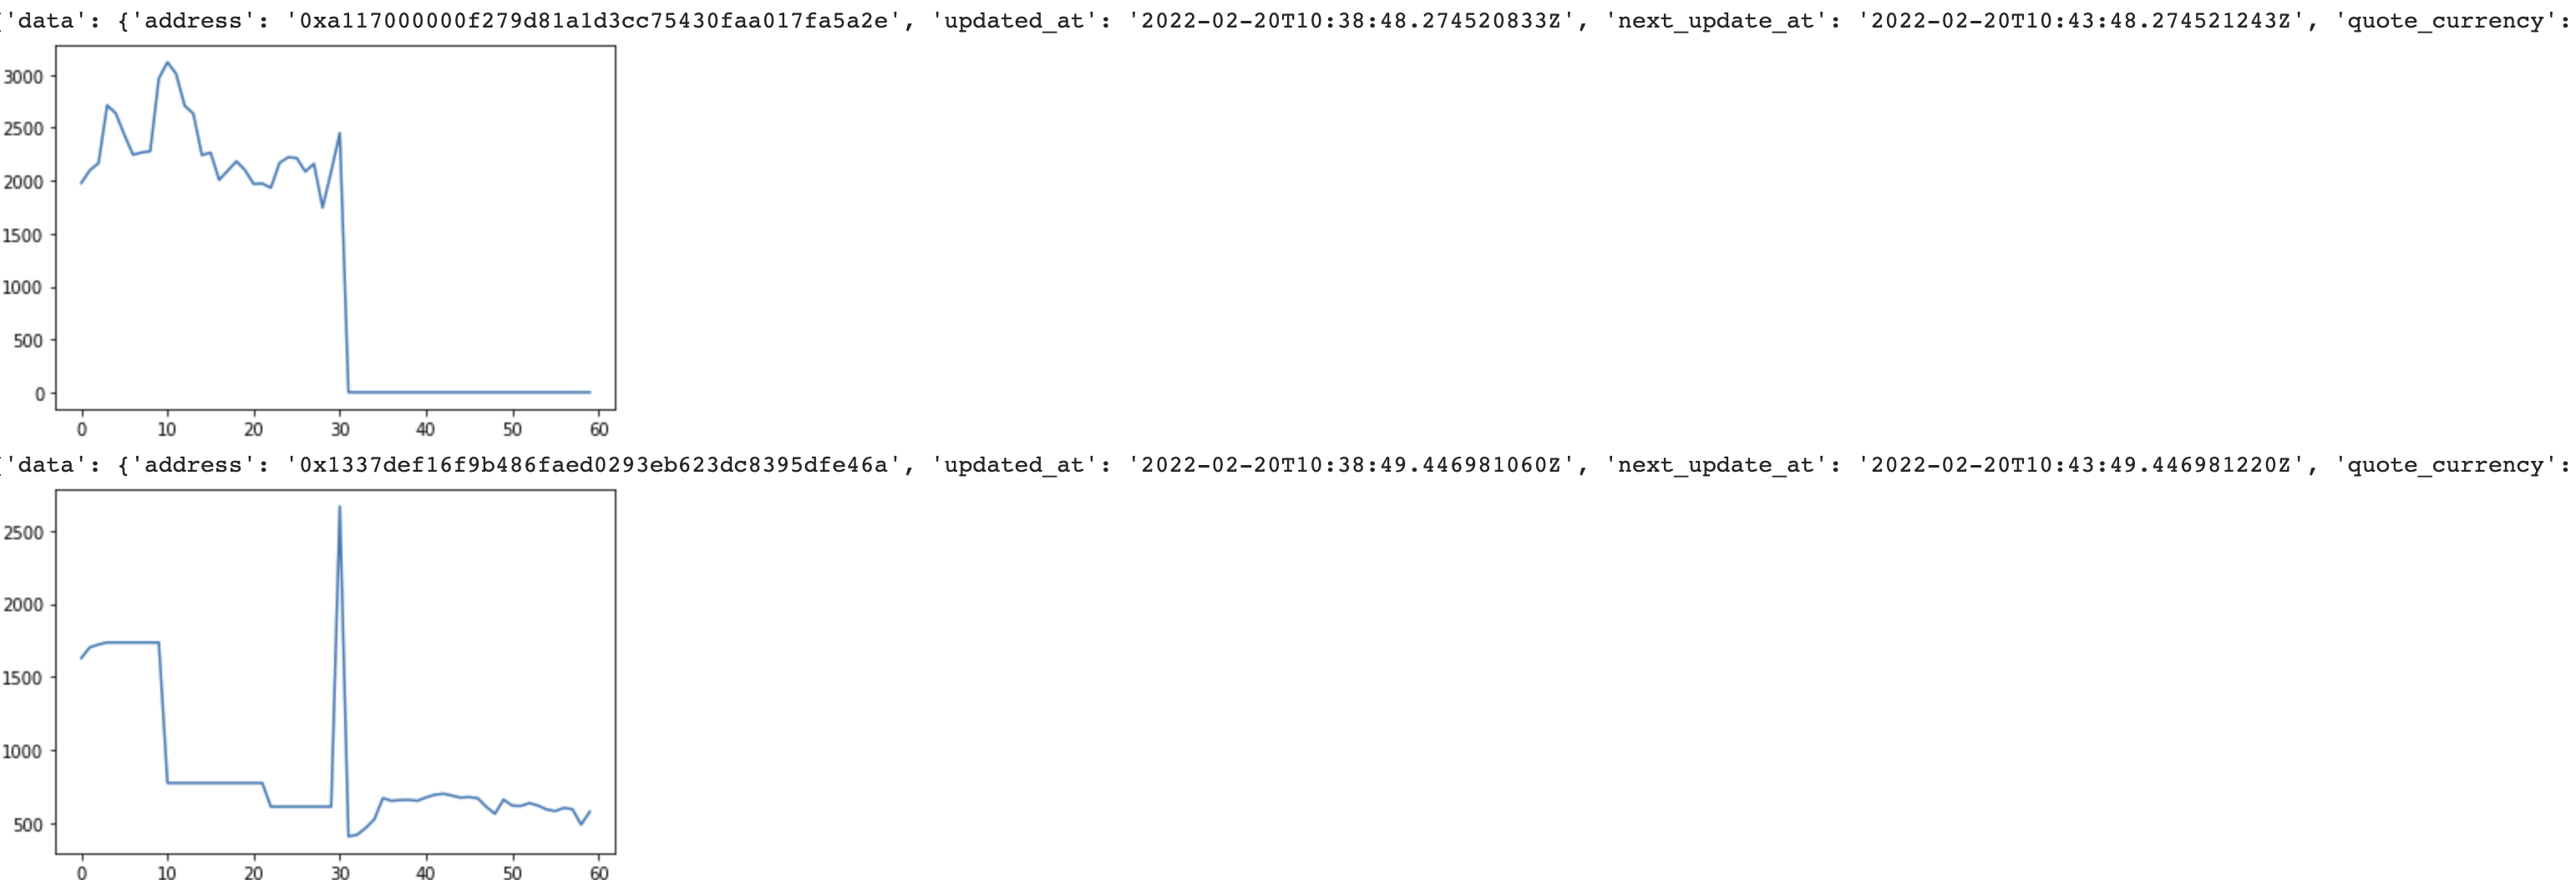

# OnChain Governance Data using Subgraph

## Daohaus, Aragon Subgraph

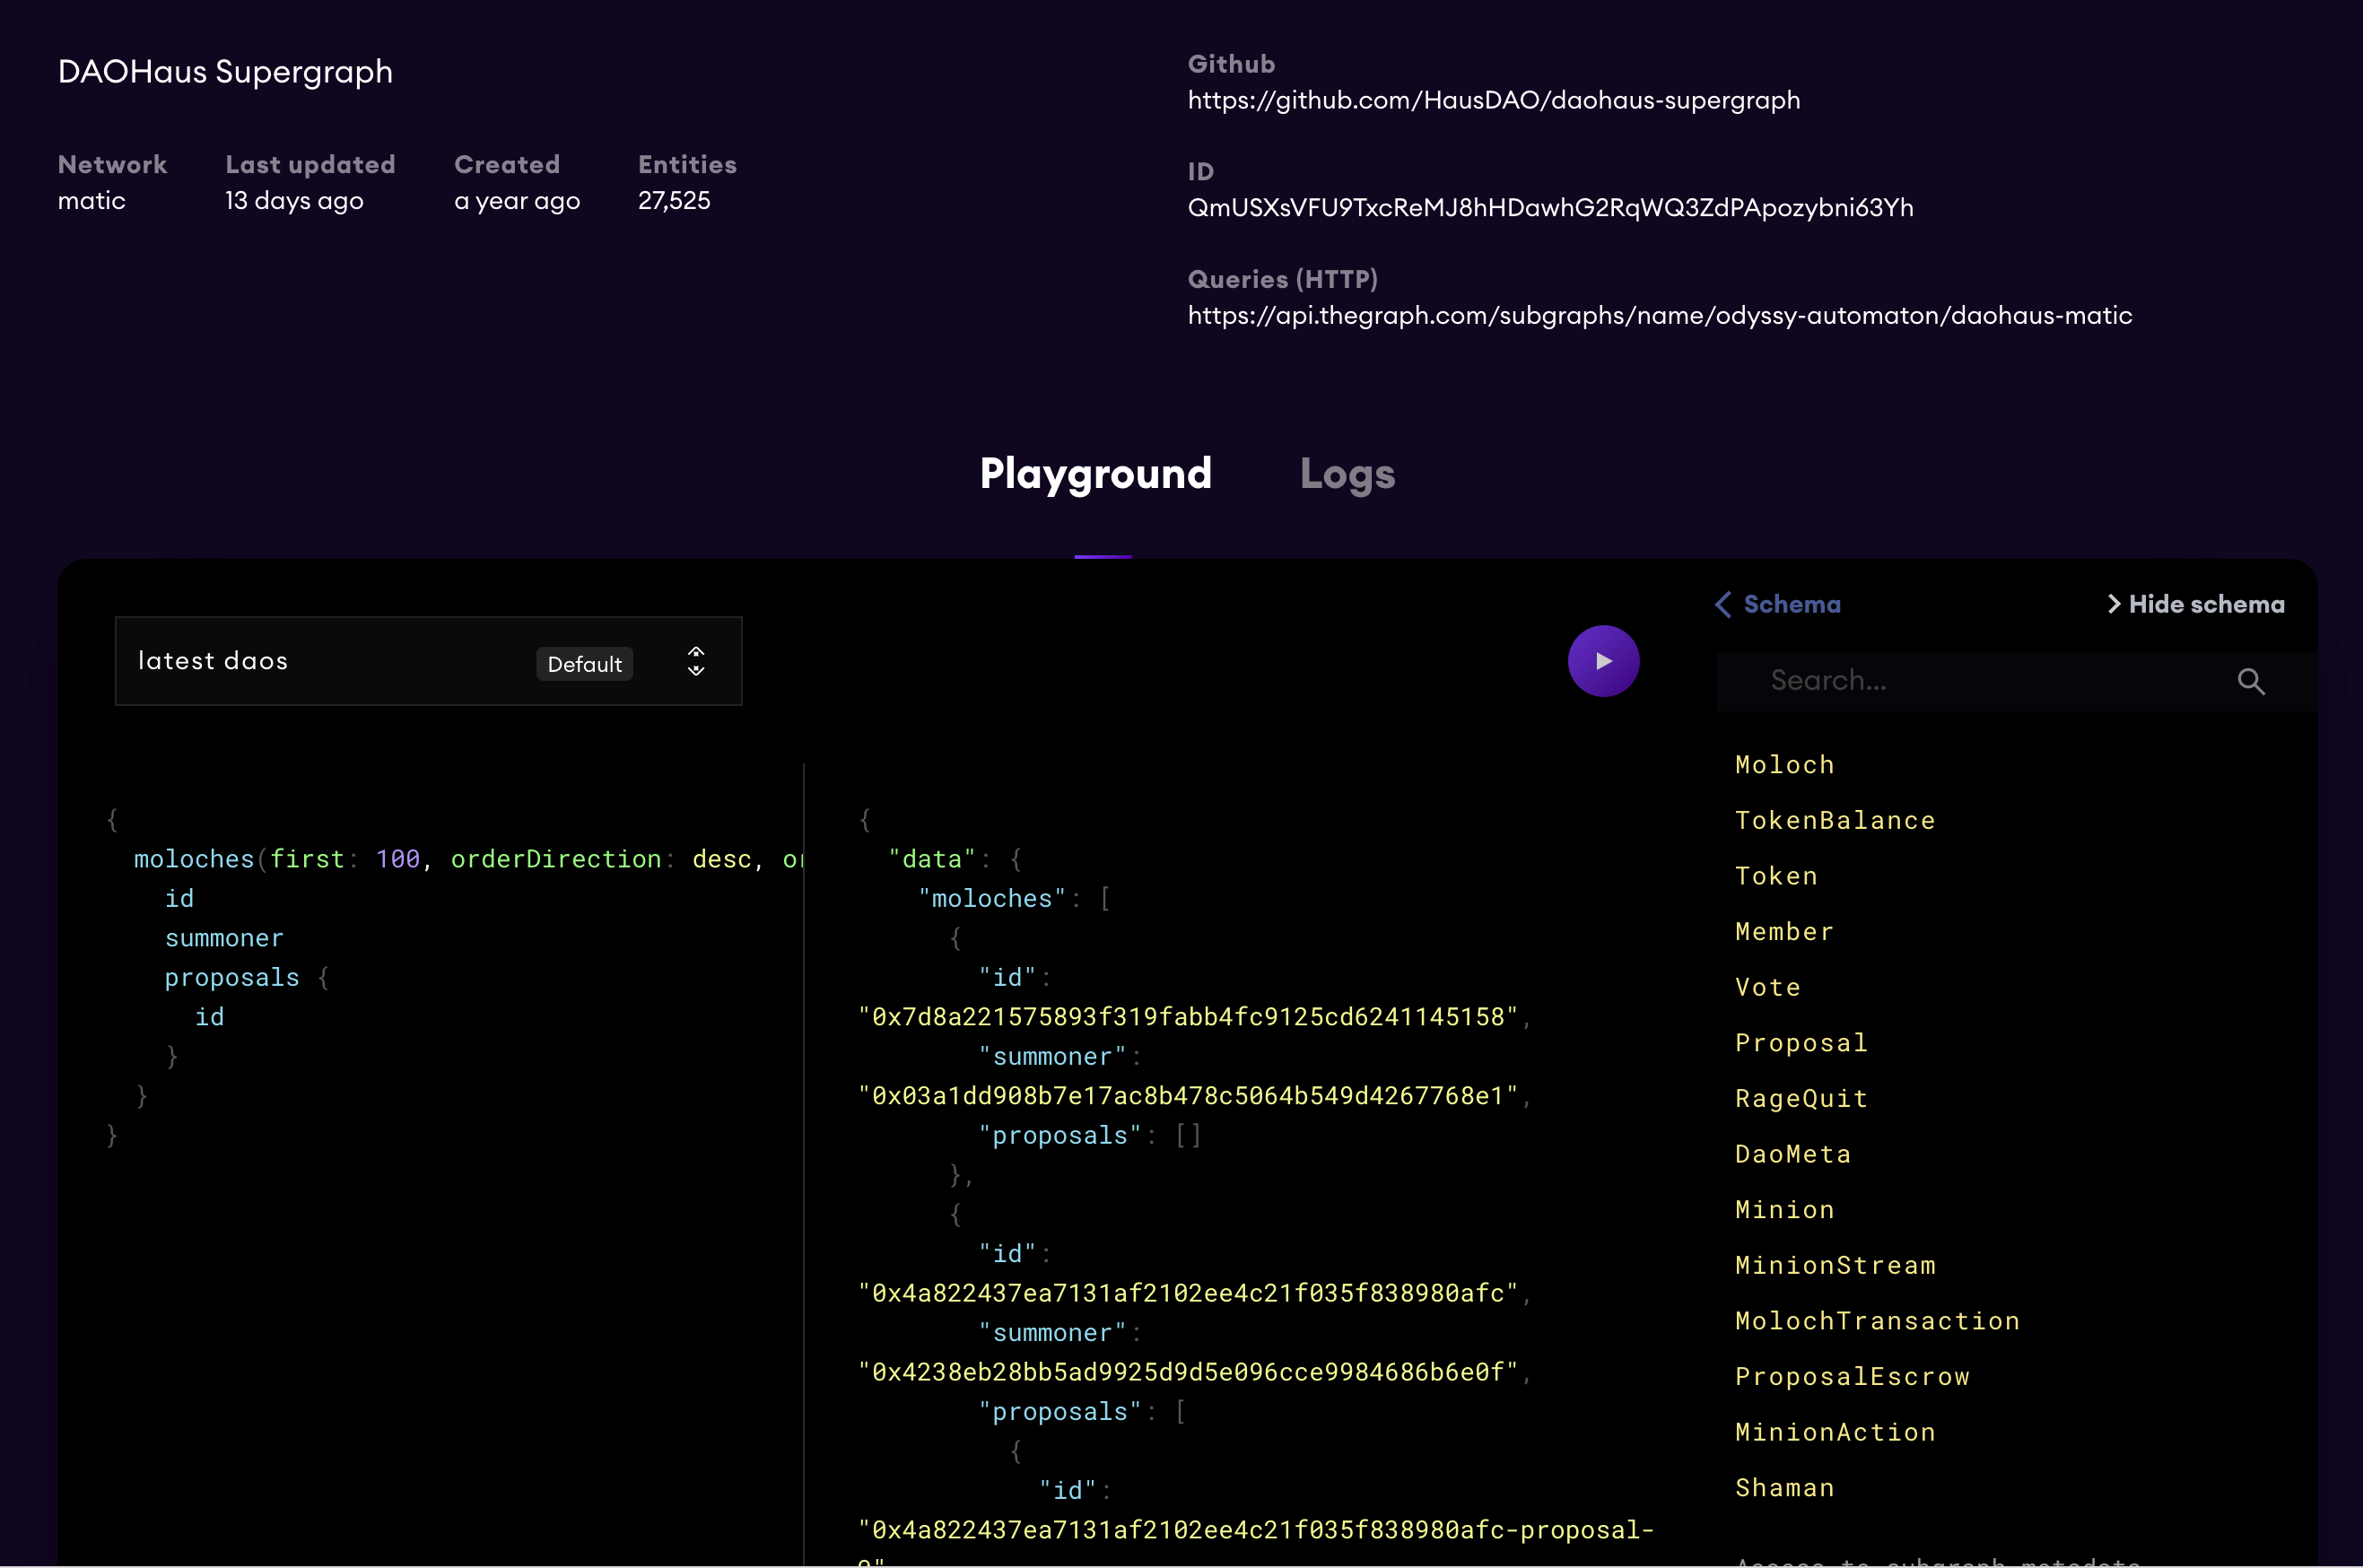

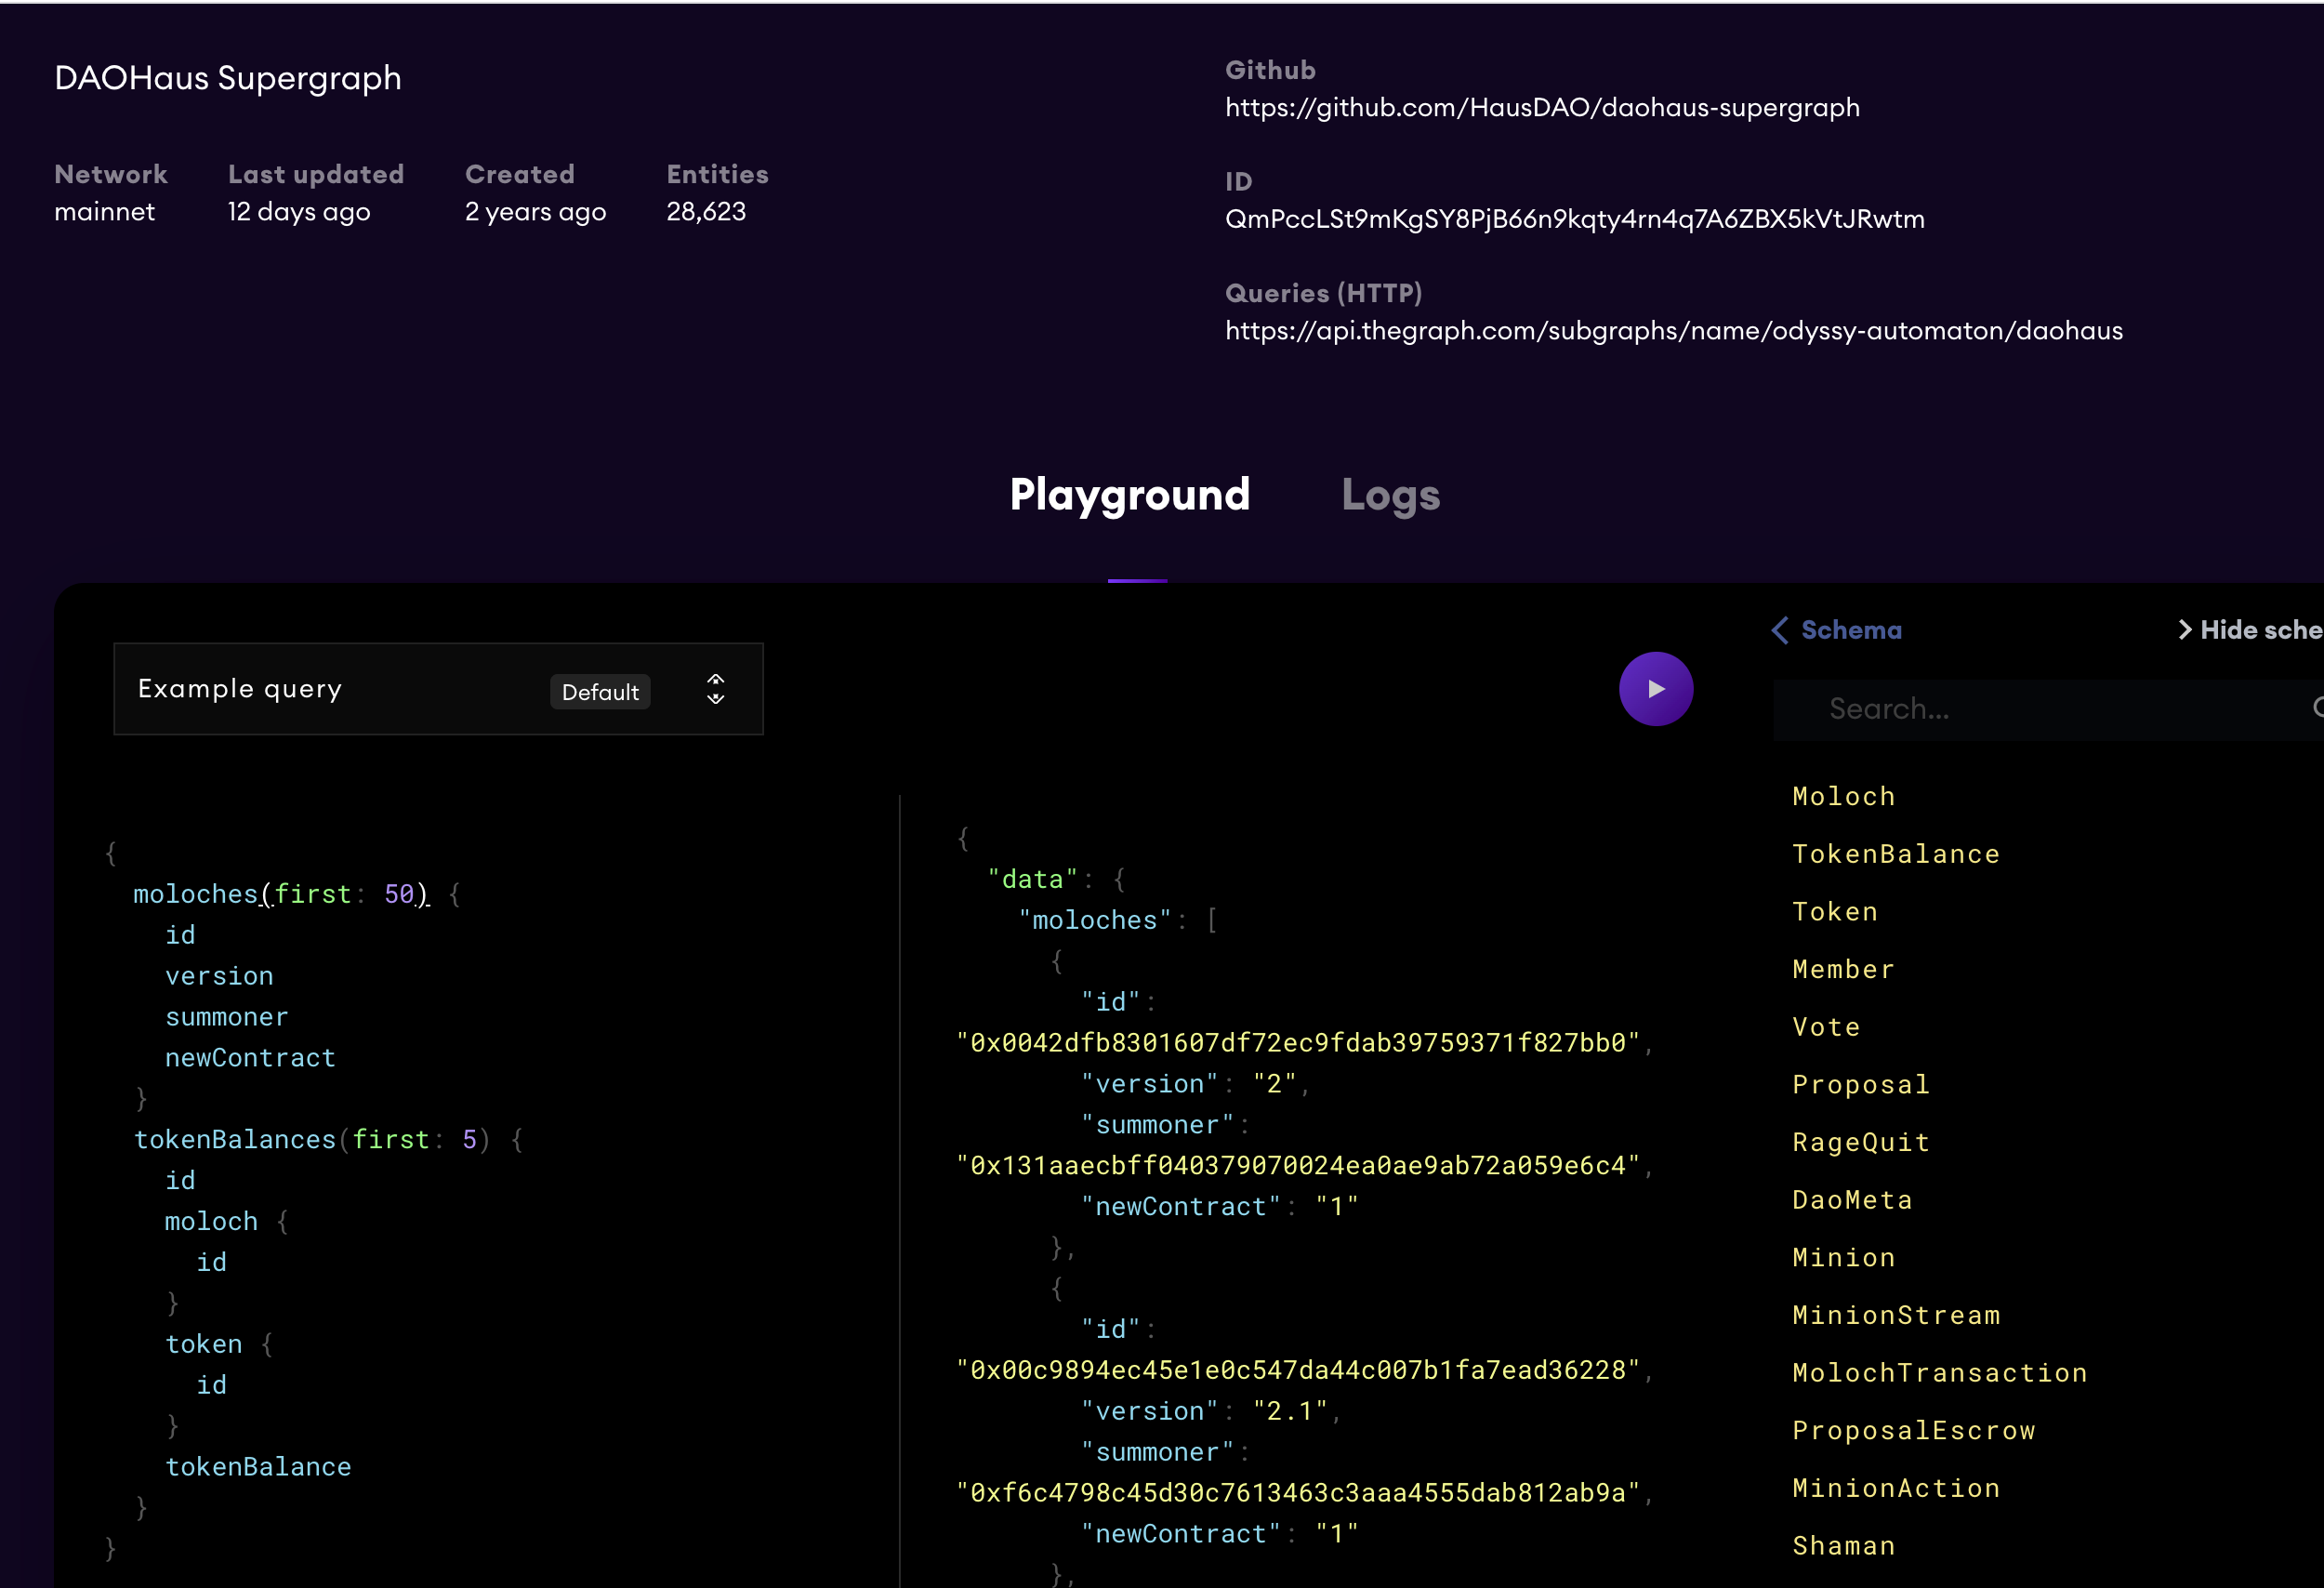